In [1]:
import pandas as pd

In [2]:
file_path = 'C:/Users/SeanPC/Desktop/Python Pandas/Data/Mental Health Survey.csv'
df = pd.read_csv(file_path)

In [3]:
df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [4]:
missing_values_before = df.isnull().sum()
missing_values_before

Timestamp                       0
Age                             0
Gender                          0
Country                         0
state                         515
self_employed                  18
family_history                  0
treatment                       0
work_interfere                264
no_employees                    0
remote_work                     0
tech_company                    0
benefits                        0
care_options                    0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
comments                     1095
dtype: int64

In [5]:
df_types_before = df.dtypes 
df_types_before

Timestamp                    object
Age                           int64
Gender                       object
Country                      object
state                        object
self_employed                object
family_history               object
treatment                    object
work_interfere               object
no_employees                 object
remote_work                  object
tech_company                 object
benefits                     object
care_options                 object
wellness_program             object
seek_help                    object
anonymity                    object
leave                        object
mental_health_consequence    object
phys_health_consequence      object
coworkers                    object
supervisor                   object
mental_health_interview      object
phys_health_interview        object
mental_vs_physical           object
obs_consequence              object
comments                     object
dtype: object

In [6]:
most_common_self_employed = df['self_employed'].mode()[0]
df['self_employed'].fillna(most_common_self_employed, inplace=True)

In [7]:
unique_genders_before = df['Gender'].unique()
unique_genders_before

array(['Female', 'M', 'Male', 'male', 'female', 'm', 'Male-ish', 'maile',
       'Trans-female', 'Cis Female', 'F', 'something kinda male?',
       'Cis Male', 'Woman', 'f', 'Mal', 'Male (CIS)', 'queer/she/they',
       'non-binary', 'Femake', 'woman', 'Make', 'Nah', 'All', 'Enby',
       'fluid', 'Genderqueer', 'Female ', 'Androgyne', 'Agender',
       'cis-female/femme', 'Guy (-ish) ^_^', 'male leaning androgynous',
       'Male ', 'Man', 'Trans woman', 'msle', 'Neuter', 'Female (trans)',
       'queer', 'Female (cis)', 'Mail', 'cis male', 'A little about you',
       'Malr', 'p', 'femail', 'Cis Man',
       'ostensibly male, unsure what that really means'], dtype=object)

In [8]:
gender_map = {
    'M': 'Male', 'Male': 'Male', 'male': 'Male', 'm': 'Male', 'Cis Male': 'Male', 'Man': 'Male', 
    'something kinda male?': 'Other', 'queer/she/they': 'Other', 'non-binary': 'Other', 
    'Femake': 'Female', 'Female ': 'Female', 'woman': 'Female', 'f': 'Female', 'I identify as female.': 'Female', 
    'female': 'Female', 'Female (cis)': 'Female', 'cis-female/femme': 'Female', 
    'femail': 'Female', 'cis female': 'Female',
}
df['Gender'] = df['Gender'].map(gender_map).fillna('Other')

In [9]:
unique_genders_after = df['Gender'].unique()
unique_genders_after

array(['Other', 'Male', 'Female'], dtype=object)

In [10]:
missing_values_after = df.isnull().sum()
missing_values_after

Timestamp                       0
Age                             0
Gender                          0
Country                         0
state                         515
self_employed                   0
family_history                  0
treatment                       0
work_interfere                264
no_employees                    0
remote_work                     0
tech_company                    0
benefits                        0
care_options                    0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
comments                     1095
dtype: int64

In [11]:
df['work_interfere'].fillna('Not applicable', inplace=True)

In [12]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
categorical_columns = ['no_employees', 'remote_work', 'tech_company', 'benefits', 'care_options', 'wellness_program', 'seek_help', 'anonymity', 'leave', 'mental_health_consequence', 'phys_health_consequence', 'coworkers', 'supervisor', 'mental_health_interview', 'phys_health_interview', 'mental_vs_physical', 'obs_consequence']
for col in categorical_columns:
    df[col] = df[col].astype('category')

In [13]:
df['Age'] = df['Age'].clip(lower=18, upper=100)

In [14]:
df['Age_group'] = pd.cut(df['Age'], bins=[18, 30, 40, 50, 100], labels=['18-30', '31-40', '41-50', '51'])

In [15]:
df['comments'] = df['comments'].str.replace('[^\w\s]', '', regex=True).str.lower()

In [16]:
df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments,Age_group
0,2014-08-27 11:29:31,37,Other,United States,IL,No,No,Yes,Often,6-25,...,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN,31-40
1,2014-08-27 11:29:37,44,Male,United States,IN,No,No,No,Rarely,More than 1000,...,Maybe,No,No,No,No,No,Don't know,No,NaN,41-50
2,2014-08-27 11:29:44,32,Male,Canada,NaN,No,No,No,Rarely,6-25,...,No,No,Yes,Yes,Yes,Yes,No,No,NaN,31-40
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,No,Yes,Yes,Often,26-100,...,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN,31-40
4,2014-08-27 11:30:22,31,Male,United States,TX,No,No,No,Never,100-500,...,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN,31-40


Explanatory Data Analysts (EDA)

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
sns.set(style="whitegrid")

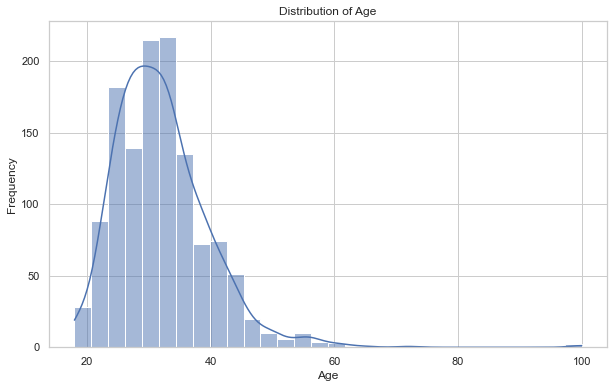

In [19]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

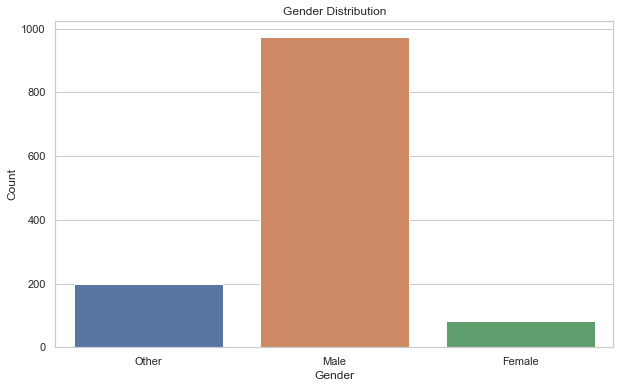

In [20]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Gender', data=df)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

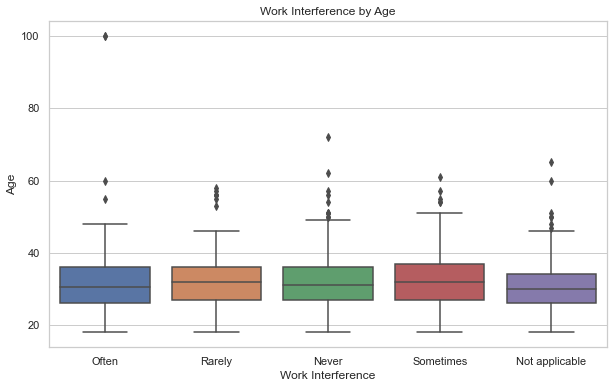

In [21]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='work_interfere', y='Age', data=df)
plt.title('Work Interference by Age')
plt.xlabel('Work Interference')
plt.ylabel('Age')
plt.show()

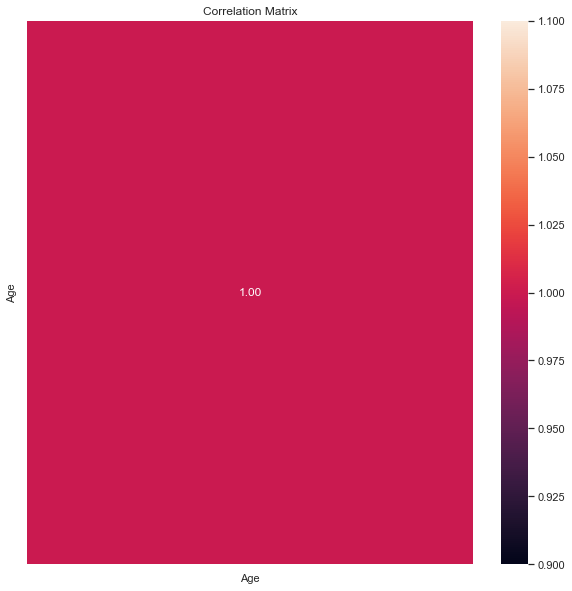

In [22]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.select_dtypes(include=['int64', 'float64']).corr(), annot=True, fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

Quantitative Analysis

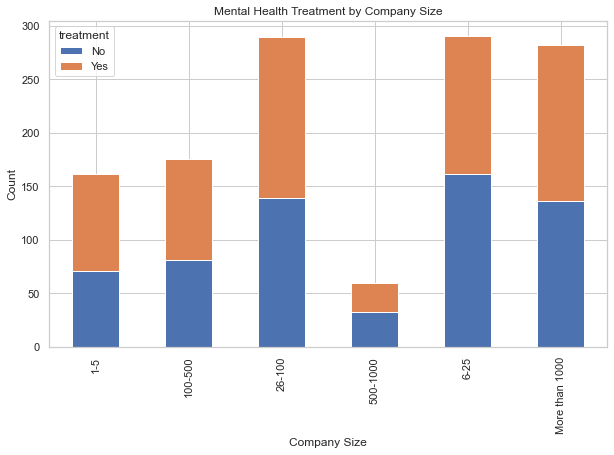

In [23]:
company_size_mental_health = pd.crosstab(df['no_employees'], df['treatment'])
company_size_mental_health.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Mental Health Treatment by Company Size')
plt.xlabel('Company Size')
plt.ylabel('Count')
plt.show()

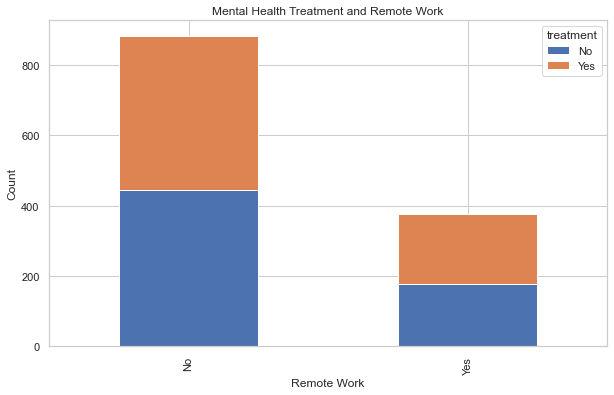

In [24]:
remote_work_mental_health = pd.crosstab(df['remote_work'], df['treatment'])
remote_work_mental_health.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Mental Health Treatment and Remote Work')
plt.xlabel('Remote Work')
plt.ylabel('Count')
plt.show()

In [25]:
from textblob import TextBlob

In [26]:
def calculate_sentiment(text):
    return TextBlob(str(text)).sentiment.polarity

In [27]:
df['comment_sentiment'] = df['comments'].apply(calculate_sentiment)

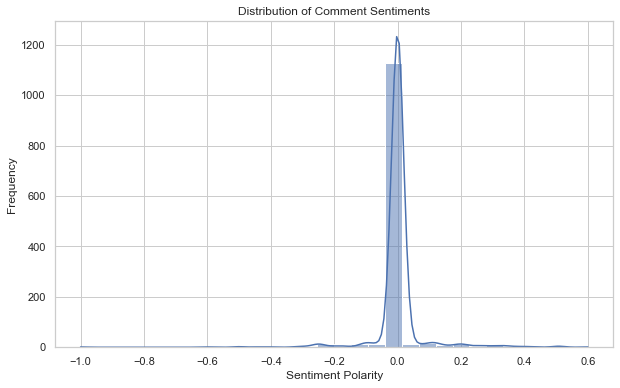

In [29]:
plt.figure(figsize=(10, 6))
sns.histplot(df['comment_sentiment'], bins=30, kde=True)
plt.title('Distribution of Comment Sentiments')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.show()

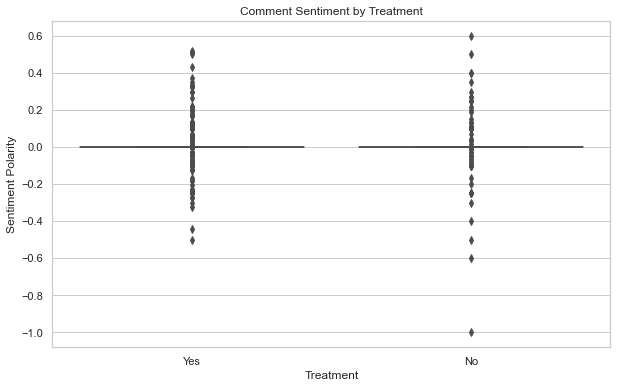

In [30]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='treatment', y='comment_sentiment', data=df)
plt.title('Comment Sentiment by Treatment')
plt.xlabel('Treatment')
plt.ylabel('Sentiment Polarity')
plt.show()